<a href="https://colab.research.google.com/github/rilgilang/Capstone-Project-2/blob/main/Capstone_Project_2_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Data Pelanggan Supermarket
Proyek ini merupakan analisis mendalam terhadap data pelanggan dari sebuah supermarket, bertujuan untuk memahami pola perilaku pelanggan, preferensi produk, dan strategi pemasaran yang efektif.

# Latar Belakang
Supermarket saat ini menghadapi persaingan yang ketat dalam menarik dan mempertahankan pelanggan. Untuk mencapai keunggulan kompetitif, penting bagi perusahaan untuk memahami demografi dan perilaku pembelian pelanggan. Dengan analisis data yang tepat, perusahaan dapat mengidentifikasi segmen pelanggan yang potensial, preferensi produk, dan mengembangkan strategi pemasaran yang lebih efektif.

# Rumusan Masalah
Bagaimana distribusi usia dan pendapatan mempengaruhi pola pembelian pelanggan?
Produk apa saja yang sering dibeli bersama oleh pelanggan dan bagaimana hal ini dapat dimanfaatkan untuk meningkatkan penjualan?
Apakah ada segmen pelanggan dengan karakteristik unik yang dapat dijadikan target pemasaran khusus?
Bagaimana supermarket dapat mempersonalisasi penawaran produk untuk meningkatkan loyalitas pelanggan?

In [51]:
import pandas as pd


# Read sample data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_customer.csv', sep='\t')

# Display the first few rows of the dataframe (optional)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning


# Checking Duplicate Data

In [53]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


# Handling Data Format

In [54]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') # Change the format string to match the actual format of your dates
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [55]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage'],
                     data=listItem)

dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage
0,ID,int64,2240,0,0.00
1,Year_Birth,int64,2240,0,0.00
2,Education,object,2240,0,0.00
3,Marital_Status,object,2240,0,0.00
4,Income,float64,2240,24,1.07
5,Kidhome,int64,2240,0,0.00
6,Teenhome,int64,2240,0,0.00
7,Dt_Customer,datetime64[ns],2240,0,0.00
8,Recency,int64,2240,0,0.00
9,MntWines,int64,2240,0,0.00


# Unique Sample

In [56]:
listItem = []
for col in df.columns :
    listItem.append([df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Number of Unique', 'Unique Sample'],
                     data=listItem)

dfDesc

,Number of Unique,Unique Sample
0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,8,"[Single, Together, Married, Divorced, Widow, A..."
4,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,3,"[0, 1, 2]"
6,3,"[0, 1, 2]"
7,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
8,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


# Missing Value

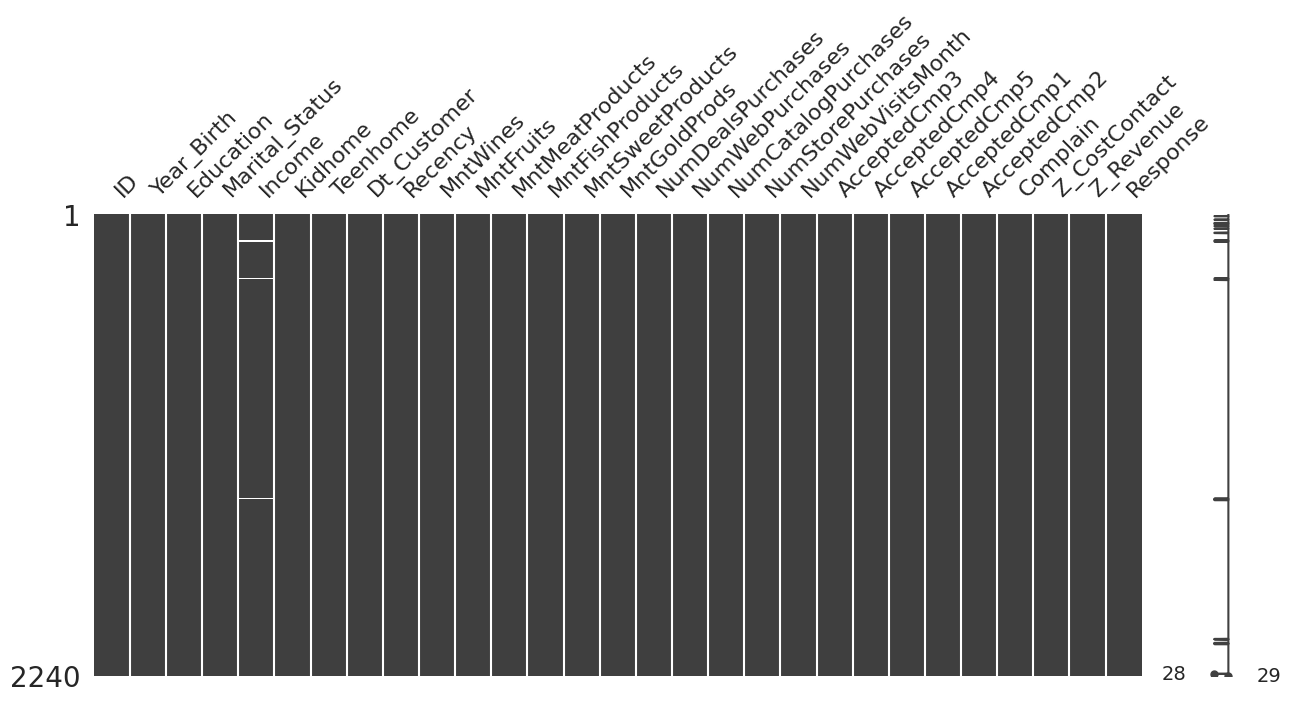

In [57]:
import missingno as msno

# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

# Check Missing Value

In [58]:
# Cek baris Missing Value yang ada pada kolom Income
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


# Fill Missing Value

In [59]:
# Fill missing value
median = df['Income'].median()

# Show value
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage'],
                     data=listItem)

dfDesc


,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage
0,ID,int64,2240,0,0.00
1,Year_Birth,int64,2240,0,0.00
2,Education,object,2240,0,0.00
3,Marital_Status,object,2240,0,0.00
4,Income,float64,2240,24,1.07
5,Kidhome,int64,2240,0,0.00
6,Teenhome,int64,2240,0,0.00
7,Dt_Customer,datetime64[ns],2240,0,0.00
8,Recency,int64,2240,0,0.00
9,MntWines,int64,2240,0,0.00


# Drop Duplicate

In [60]:
df.drop_duplicates(inplace=True)

# Outlier Checker

# Botplox Outlier

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric collumn list
numeric_columns = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Z_CostContact', 'Income', 'Response'
]

# Delete row with missing value in numeric columns
df = df.dropna(subset=numeric_columns)

# Translate Column Name to Indonesian
indonesian_names = {
    'Year_Birth': 'Tahun Lahir',
    'Income': 'Pendapatan',
    'Kidhome': 'Anak di Rumah',
    'Teenhome': 'Remaja di Rumah',
    'Recency': 'Waktu Pembelian Terakhir',
    'MntWines': 'Pengeluaran Anggur',
    'MntFruits': 'Pengeluaran Buah',
    'MntMeatProducts': 'Pengeluaran Daging',
    'MntFishProducts': 'Pengeluaran Ikan',
    'MntSweetProducts': 'Pengeluaran Manisan',
    'MntGoldProds': 'Pengeluaran Emas',
    'NumDealsPurchases': 'Pembelian dengan Diskon',
    'NumWebPurchases': 'Pembelian Online',
    'NumCatalogPurchases': 'Pembelian Katalog',
    'NumStorePurchases': 'Pembelian di Toko',
    'NumWebVisitsMonth': 'Kunjungan Web Bulanan',
    'AcceptedCmp3': 'Kampanye 3 Diterima',
    'AcceptedCmp4': 'Kampanye 4 Diterima',
    'AcceptedCmp5': 'Kampanye 5 Diterima',
    'AcceptedCmp1': 'Kampanye 1 Diterima',
    'AcceptedCmp2': 'Kampanye 2 Diterima',
    'Complain': 'Keluhan',
    'Z_CostContact': 'Biaya Kontak',
    'Response': 'Respon'
}

# Divide dataset into chunks
chunks = [numeric_columns[i:i + 9] for i in range(0, len(numeric_columns), 9)]

# Loop for every chunk
for chunk in chunks:
    for i, col in enumerate(chunk):
        # Check if column exists in DataFrame and is numeric
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Calculate IQR and bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

            # Print outliers for the column
            print(f"Outliers for {indonesian_names.get(col, col)}:")
            print(outliers)
        else:
            print(f"Kolom {col} tidak ada atau bukan numerik.")

Outliers for Tahun Lahir:
192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64
Outliers for Pendapatan:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64
Outliers for Anak di Rumah:
Series([], Name: Kidhome, dtype: int64)
Outliers for Remaja di Rumah:
Series([], Name: Teenhome, dtype: int64)
Outliers for Waktu Pembelian Terakhir:
Series([], Name: Recency, dtype: int64)
Outliers for Pengeluaran Anggur:
111     1332
161     1349
295     1241
424     1285
430     1248
466     1239
497     1396
515     1288
523     1379
543     1478
559     1492
824     1492
826     1279
870     1308
917     1478
937     1253
987     1394
990     1296
1001    1285
1010    1230
1052    1315
1191    1298
1458    1302
1488    1449
1492    1259
1577    1252
1641    1459
1749    1493
1922    1324
1953    1285
1961    1462
1992    1276
2067    1245
2098    1486
2127    1311
Name: MntWi

In [63]:
# Counting Age
import datetime  # Import the datetime module

current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Inisialisasi kolom 'Age_Group'
df['Age_Group'] = ""

for i, birth in enumerate(df['Year_Birth']):
    if birth >= 1995:
        df.loc[i, 'Age_Group'] = "Gen Z <20"  # Age ranges 20 -
    elif birth >= 1980:
        df.loc[i, 'Age_Group'] = "Gen Y 21-35"
    elif birth >= 1965:
        df.loc[i, 'Age_Group'] = "Gen X 36-50"
    elif birth >= 1946:
        df.loc[i, 'Age_Group'] = "Boomers 51-69"
    else:
        df.loc[i, 'Age_Group'] = "Builders >70"


df['Age_Group'].value_counts()

,count
Age_Group,
Gen X 36-50,1022
Boomers 51-69,749
Gen Y 21-35,412
Builders >70,26
,23
Gen Z <20,7


From the table above customer with age > 70 is odd so we need to drop it

In [64]:
# Drop outliers according to upper bound
df = df[df['Age'] < 70]

# Data cleaning / Pembersihan data

In [65]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,ID,float64,1900,0,0.0,1900,"[5524.0, 4141.0, 6182.0, 5324.0, 7446.0, 965.0..."
1,Year_Birth,float64,1900,0,0.0,42,"[1957.0, 1965.0, 1984.0, 1981.0, 1967.0, 1971...."
2,Education,object,1900,0,0.0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,1900,0,0.0,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1900,0,0.0,1696,"[58138.0, 71613.0, 26646.0, 58293.0, 62513.0, ..."
5,Kidhome,float64,1900,0,0.0,3,"[0.0, 1.0, 2.0]"
6,Teenhome,float64,1900,0,0.0,3,"[0.0, 1.0, 2.0]"
7,Dt_Customer,datetime64[ns],1900,0,0.0,638,"[2012-09-04 00:00:00, 2013-08-21 00:00:00, 201..."
8,Recency,float64,1900,0,0.0,100,"[58.0, 26.0, 94.0, 16.0, 34.0, 32.0, 19.0, 59...."
9,MntWines,float64,1900,0,0.0,695,"[635.0, 426.0, 11.0, 173.0, 520.0, 235.0, 76.0..."


# Renaming Column

In [66]:
df.rename(columns={
    'Year_Birth': 'Birth year',
    'Marital_Status': 'Relationship status',
    'Recency': 'Last_Purchase',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold',
    'AcceptedCmp1': 'Campaign_1',
    'AcceptedCmp2': 'Campaign_2',
    'AcceptedCmp3': 'Campaign_3',
    'AcceptedCmp4': 'Campaign_4',
    'AcceptedCmp5': 'Campaign_5',
    'NumDealsPurchases': 'Purchase_withdiscounts',
    'NumWebPurchases': 'Web_Purchase',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'store_purchases',
    'NumWebVisitsMonth': 'Web_visits'
}, inplace=True)

<ipython-input-66-2a2896d3f9fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


# Visualisasi Data

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# General Data


In [ ]:
df

# Proposi status pernikahan pelanggan



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace values in the 'Marital_Status' column
df['Relationship status'] = df['Relationship status'].replace({
    'Absurd': 'Single',
    'Alone': 'Single',
    'Divorce' : 'Single',
    'YOLO': 'Single',
    'Widow': 'Single'
    'Maried': 'In relationship',
    'Together': 'In relationship',
})

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot
df['Relationship status'].value_counts().plot.bar(
    color=sns.color_palette('Set2'),
    edgecolor='black'
)

# Add title and labels
plt.title('Proportion of Customer Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Relationship status', fontsize=14)
plt.ylabel('Customer Total', fontsize=14)

# Show the plot
plt.show()

Pada bar chart diatas menunjukkan jumlah pelanggan berdasarkan status pernikahan mereka. Berikut adalah penjelasan lebih detail mengenai data yang ditampilkan:

1. Kategori Status Pernikahan:
  * **Married** (Menikah): Pelanggan dengan status menikah memiliki jumlah tertinggi, yaitu lebih dari 800 pelanggan.
  * **Together** (Bersama): Kategori ini mewakili pelanggan yang mungkin tinggal bersama tanpa menikah secara formal, dan jumlahnya sekitar 600 pelanggan.
  * **Single** (Lajang): Pelanggan yang belum menikah juga cukup banyak, dengan jumlah sekitar 500 orang.
  * **Divorced** (Bercerai): Pelanggan dengan status perceraian tercatat lebih rendah dibandingkan kategori sebelumnya, yaitu sekitar 300 orang.
  * **Widow** (Janda/Duda): Ini adalah kategori dengan jumlah paling sedikit di antara yang disebutkan sebelumnya, dengan jumlah pelanggan kurang dari 100.
  * **Alone** (Sendiri), Absurd (Tidak jelas), YOLO: Ketiga kategori ini memiliki jumlah yang sangat rendah hingga mendekati nol.

2. Distribusi Status Pernikahan:
  * **Mayoritas pelanggan** berada dalam kategori Married dan **Together**, yang menunjukkan bahwa banyak pelanggan berasal dari keluarga yang stabil.
  * Single dan Divorced menunjukkan variasi dalam status pernikahan pelanggan, yang bisa berkaitan dengan segmentasi pasar berdasarkan usia, preferensi produk, atau strategi pemasaran yang berbeda.
  * Widow (Janda/Duda) memiliki jumlah pelanggan yang kecil, yang mungkin menunjukkan bahwa segmen ini kurang terwakili dalam basis pelanggan atau mungkin kurang tertarik pada produk yang ditawarkan.

Analisis:
  * **Segmentasi Pelanggan**: Berdasarkan data ini, perusahaan dapat mempertimbangkan segmentasi pelanggan berdasarkan status pernikahan. Misalnya, pasangan yang menikah atau tinggal bersama mungkin tertarik pada produk tertentu yang berbeda dengan mereka yang lajang atau bercerai.
  * **Strategi Pemasaran**: Perusahaan dapat mengembangkan strategi pemasaran yang lebih terarah dengan mempertimbangkan status pernikahan pelanggan. Misalnya, menawarkan paket keluarga atau promosi khusus untuk pasangan yang sudah menikah.
  * **Diversifikasi Produk**: Kategori seperti "Single" dan "Divorced" juga menunjukkan pasar potensial untuk produk atau layanan yang mungkin lebih sesuai dengan kebutuhan mereka.

Visualisasi ini membantu memberikan wawasan mengenai bagaimana status pernikahan dapat mempengaruhi jumlah pelanggan dalam berbagai kategori, yang penting untuk pengambilan keputusan strategis dalam pemasaran dan pengembangan produk.

# Boxplot Outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom numerik yang ingin dianalisis dengan boxplot
numeric_columns = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Z_CostContact', 'Income', 'Response'
]

# Menghapus baris yang memiliki nilai kosong pada kolom numerik
df = df.dropna(subset=numeric_columns)

# Terjemahan nama kolom ke Bahasa Indonesia
indonesian_names = {
    'Year_Birth': 'Tahun Lahir',
    'Income': 'Pendapatan',
    'Kidhome': 'Anak di Rumah',
    'Teenhome': 'Remaja di Rumah',
    'Recency': 'Waktu Pembelian Terakhir',
    'MntWines': 'Pengeluaran Anggur',
    'MntFruits': 'Pengeluaran Buah',
    'MntMeatProducts': 'Pengeluaran Daging',
    'MntFishProducts': 'Pengeluaran Ikan',
    'MntSweetProducts': 'Pengeluaran Manisan',
    'MntGoldProds': 'Pengeluaran Emas',
    'NumDealsPurchases': 'Pembelian dengan Diskon',
    'NumWebPurchases': 'Pembelian Online',
    'NumCatalogPurchases': 'Pembelian Katalog',
    'NumStorePurchases': 'Pembelian di Toko',
    'NumWebVisitsMonth': 'Kunjungan Web Bulanan',
    'AcceptedCmp3': 'Kampanye 3 Diterima',
    'AcceptedCmp4': 'Kampanye 4 Diterima',
    'AcceptedCmp5': 'Kampanye 5 Diterima',
    'AcceptedCmp1': 'Kampanye 1 Diterima',
    'AcceptedCmp2': 'Kampanye 2 Diterima',
    'Complain': 'Keluhan',
    'Z_CostContact': 'Biaya Kontak',
    'Response': 'Respon'
}

# Membagi dataset menjadi beberapa bagian
chunks = [numeric_columns[i:i + 9] for i in range(0, len(numeric_columns), 9)]

# Loop untuk setiap chunk
for chunk in chunks:
    plt.figure(figsize=(20, 18))
    for i, col in enumerate(chunk):
        # Pastikan kolom ada dalam DataFrame dan bertipe numerik
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.subplot(3, 3, i + 1)  # Membuat subplot grid dengan 3x3
            sns.boxplot(x=df[col])
            # Gunakan nama kolom dalam Bahasa Indonesia jika tersedia
            title = indonesian_names.get(col, col)
            plt.title(f'Pencilan dalam Kolom {title}')
        else:
            print(f"Kolom {col} tidak ada atau bukan numerik.")
    plt.tight_layout()
    plt.show()

Pada Histogram diatas dapat kita lihat
1. Distribusi Usia Pelanggan:
  *   Puncak Distribusi: Histogram menunjukkan bahwa  mayoritas pelanggan berada pada kisaran usia sekitar 40 hingga 65 tahun. Ini terlihat dari puncak yang berada di sekitar rentang usia tersebut.
  *   Usia Terbanyak: Usia yang paling umum (dengan jumlah pelanggan terbanyak) tampaknya berada di sekitar 50 tahun. Ini ditunjukkan oleh bilah tertinggi di histogram.

2. Persebaran Usia:
  *   Kebanyakan Usia: Kebanyakan pelanggan berada dalam rentang usia produktif, yaitu sekitar 35 hingga 70 tahun.
  *   Usia Lanjut: Terdapat beberapa pelanggan yang berusia lebih dari 80 tahun, meskipun jumlahnya lebih sedikit. Ini menunjukkan bahwa ada pelanggan yang cukup lanjut usia, tetapi tidak banyak.
  *   Pelanggan Muda: Terdapat beberapa pelanggan yang lebih muda (sekitar 20-30 tahun), tetapi jumlahnya juga relatif kecil.
3. Tail Distribusi:
  * Kiri dan Kanan: Histogram memiliki sedikit ekor di kedua sisi. Ekor kiri (pelanggan yang lebih muda) lebih pendek dibandingkan ekor kanan (pelanggan yang lebih tua), tetapi keduanya relatif kecil.
  * Distribusi Tidak Simetris: Histogram menunjukkan sedikit kemiringan ke arah kanan, artinya ada lebih banyak pelanggan yang lebih tua (di atas 50 tahun) daripada pelanggan yang lebih muda.
4. Kepadatan Kernel (KDE):
  * Garis KDE: Garis biru halus di atas histogram menunjukkan estimasi kepadatan kernel (KDE), yang memberikan gambaran halus tentang distribusi usia.
  * Puncak KDE: Puncak KDE bertepatan dengan puncak histogram, menegaskan bahwa mayoritas pelanggan berada di sekitar usia 50 tahun.

**Kesimpulan:**
    Dari histogram ini, bisa di simpulkan bahwa pelanggan kebanyakan berada di usia paruh baya hingga usia lanjut. Ada sangat sedikit pelanggan yang sangat muda atau sangat tua. Dengan demikian, strategi pemasaran mungkin perlu difokuskan pada kelompok usia yang paling dominan, yaitu sekitar 40-65 tahun.

In [ ]:
import datetime


# Hitung usia berdasarkan tahun kelahiran
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Plot histogram dengan usia
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan', fontsize=16, fontweight='light')
plt.xlabel('Usia', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.show()

# Rata rata pendapatan barang berdasarkan status pernikahan pelanggan

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Income', hue='Marital_Status', data=df, errorbar=None, palette='muted', dodge=False, legend=False)
plt.title('Rata-rata Pendapatan Berdasarkan Status Pernikahan', fontsize=16, fontweight='bold')
plt.xlabel('Status Pernikahan', fontsize=14)
plt.ylabel('Rata-rata Pendapatan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Heatmap Pembelian Produk

In [ ]:
plt.figure(figsize=(8, 8))
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.heatmap(df[product_cols].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Korelasi Antar Produk yang Dibeli', fontsize=16, fontweight='bold')
plt.show()

pada heatmap diatas menunjukkan korelasi antar produk yang dibeli oleh pelanggan, di mana nilai korelasi diwakili oleh warna dan angka yang ditampilkan di dalam kotak.

Penjelasan:
  * MntWines: Mengacu pada jumlah pengeluaran untuk anggur.
  * MntFruits: Mengacu pada jumlah pengeluaran untuk buah-buahan.
  * MntMeatProducts: Mengacu pada jumlah pengeluaran untuk produk daging.
  * MntFishProducts: Mengacu pada jumlah pengeluaran untuk produk ikan.
  * MntSweetProducts: Mengacu pada jumlah pengeluaran untuk produk manis.
  * MntGoldProds: Mengacu pada jumlah pengeluaran untuk produk emas.

Interpretasi Warna dan Angka:
  * Korelasi Positif: Angka korelasi berkisar antara 0 dan 1, di mana 1 menunjukkan korelasi sempurna (keduanya selalu berubah bersama-sama), dan angka yang lebih tinggi menunjukkan korelasi yang lebih kuat. Warna semakin gelap mendekati 1 menunjukkan korelasi yang lebih kuat.
  * Korelasi Negatif: Tidak ada nilai negatif dalam heatmap ini, sehingga semua produk menunjukkan korelasi positif dalam berbagai derajat.

Analisis Korelasi:
  * Korelasi Tertinggi:
MntMeatProducts dan MntFishProducts: Kedua produk ini memiliki korelasi yang cukup kuat, yaitu sebesar 0.57. Ini menunjukkan bahwa pelanggan yang sering membeli produk daging cenderung juga membeli produk ikan.
  * MntMeatProducts dan MntWines: Juga memiliki korelasi sebesar 0.57, menunjukkan adanya kecenderungan pelanggan yang membeli daging juga membeli anggur.
  * MntFruits dan MntFishProducts: Memiliki korelasi 0.59, menandakan hubungan kuat antara pembelian buah-buahan dan ikan.
  * MntFruits dan MntSweetProducts: Korelasi sebesar 0.57 menunjukkan bahwa pembelian buah-buahan sering berkaitan dengan pembelian produk manis.

Korelasi Rendah:
  * MntGoldProds (Produk Emas) memiliki korelasi terendah dengan produk lain, khususnya dengan MntMeatProducts (0.36). Ini menandakan bahwa pembelian produk emas cenderung tidak terlalu berhubungan dengan pembelian produk lain.

Kesimpulan:
  * Pengelompokan Produk: Dari heatmap ini, kita dapat melihat bahwa produk makanan seperti daging, ikan, dan buah-buahan cenderung dibeli bersama. Sedangkan produk emas (MntGoldProds) tidak menunjukkan korelasi yang kuat dengan produk lainnya, yang mungkin mengindikasikan bahwa pembelian produk emas adalah sesuatu yang lebih spesifik dan terpisah dari pola konsumsi sehari-hari.
  * Strategi Pemasaran: Pemahaman ini bisa digunakan untuk merancang paket promosi yang menargetkan produk yang sering dibeli bersama, seperti daging dan anggur, atau buah-buahan dan produk manis.
  
Visualisasi ini memberikan wawasan tentang bagaimana pelanggan mungkin memiliki kebiasaan pembelian yang terkait satu sama lain, yang bisa menjadi dasar untuk strategi pemasaran yang lebih efektif.

# Rata rata pendapatan berdasarkan status pernikahan dan pendidikan

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Income', hue='Education', data=df, ci=None, palette='Paired')
plt.title('Rata-rata Pendapatan Berdasarkan Status Pernikahan dan Pendidikan', fontsize=16, fontweight='bold')
plt.xlabel('Status Pernikahan', fontsize=14)
plt.ylabel('Rata-rata Pendapatan', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Pendidikan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Kesimpulan**
Berdasarkan data yang telah dijabarkan, berikut adalah kesimpulan utama:

1. Distribusi Status Pernikahan Pelanggan:
  * Sebagian besar pelanggan berada dalam status pernikahan "Married" dan "Together," menunjukkan bahwa kelompok ini adalah mayoritas dari basis pelanggan.
  * Status seperti "Widow," "Alone," "Absurd," dan "YOLO" memiliki representasi yang sangat kecil.

2. Rata-rata Pendapatan Berdasarkan Status Pernikahan:
  * Pelanggan dengan status pernikahan "Absurd" memiliki rata-rata pendapatan tertinggi, jauh melebihi status lainnya.
  * Rata-rata pendapatan pelanggan dengan status "Married," "Together," dan "Single" cukup seimbang, sementara status "Alone" memiliki rata-rata pendapatan yang lebih rendah.

3. Korelasi Antar Produk yang Dibeli:
  * Terdapat korelasi yang signifikan antara pembelian produk daging, ikan, dan anggur, yang menunjukkan bahwa pelanggan yang membeli satu jenis produk cenderung membeli jenis produk lainnya.
  * Produk emas menunjukkan korelasi yang lemah dengan produk lainnya, yang mungkin menunjukkan bahwa pembelian produk emas lebih bersifat spesifik dan tidak terkait dengan pola pembelian produk makanan.

**Saran untuk Pengembangan Strategi Berdasarkan Analisis Data**

1. Segmentasi dan Targeting:
  * Segmentasi Berdasarkan Status Pernikahan: Mengingat bahwa "Married" dan "Together" adalah segmen terbesar, pertimbangkan untuk mengembangkan kampanye pemasaran yang secara khusus menargetkan kebutuhan dan preferensi dari kelompok ini.
  * Targeting Berdasarkan Pendapatan: Pelanggan dengan status "Absurd" memiliki pendapatan tertinggi. Ini bisa menjadi target untuk produk atau layanan premium. Segmentasi lebih lanjut berdasarkan analisis demografis tambahan bisa memperkuat strategi ini.

2. Pengembangan Produk dan Bundling:
  * Bundle Produk yang Sering Dibeli Bersama: Mengingat korelasi yang kuat antara pembelian daging, ikan, dan anggur, pertimbangkan untuk menawarkan paket atau bundling produk ini untuk meningkatkan penjualan silang (cross-selling).
  * Pemasaran Produk Emas: Produk emas yang memiliki korelasi rendah dengan produk lainnya bisa dipromosikan secara terpisah dengan strategi yang menekankan keunikan atau nilai eksklusifnya.

3. Penggunaan Data untuk Personalization:
  * Gunakan wawasan dari korelasi produk untuk menawarkan rekomendasi produk yang dipersonalisasi kepada pelanggan. Sebagai contoh, jika pelanggan sering membeli daging, tawarkan anggur atau ikan sebagai tambahan.

4. Eksplorasi Anomali atau Kelompok Khusus:
  * Status "Absurd" dan "YOLO" yang unik dan memiliki ciri-ciri pendapatan yang tidak biasa perlu dieksplorasi lebih lanjut. Analisis lebih dalam bisa membantu memahami apakah ini anomali data atau ada segmen pelanggan yang sebenarnya, yang bisa menjadi peluang baru.

5.Analisis Lanjutan:
  * Clustering: Lakukan analisis clustering untuk mengidentifikasi kelompok pelanggan berdasarkan perilaku pembelian dan demografi lainnya, yang bisa membantu dalam penargetan lebih lanjut.
  * Predictive Analytics: Gunakan model prediktif untuk memperkirakan produk apa yang mungkin dibeli oleh pelanggan berdasarkan sejarah pembelian mereka dan profil demografis, sehingga dapat meningkatkan efisiensi kampanye pemasaran.
  
Dengan implementasi saran-saran ini, diharapkan strategi bisnis yang lebih terarah dan efektif dapat tercapai, meningkatkan kepuasan pelanggan serta memaksimalkan keuntungan perusahaan.

Export clean data

In [ ]:
# Assuming 'df' is your DataFrame
df.to_csv('capstone_project_2.csv', index=False)
df.to_excel('capstone_project_2.xlsx', index=False)
